<a href="https://colab.research.google.com/github/anisbagwan/Bike-sharing-demand-prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

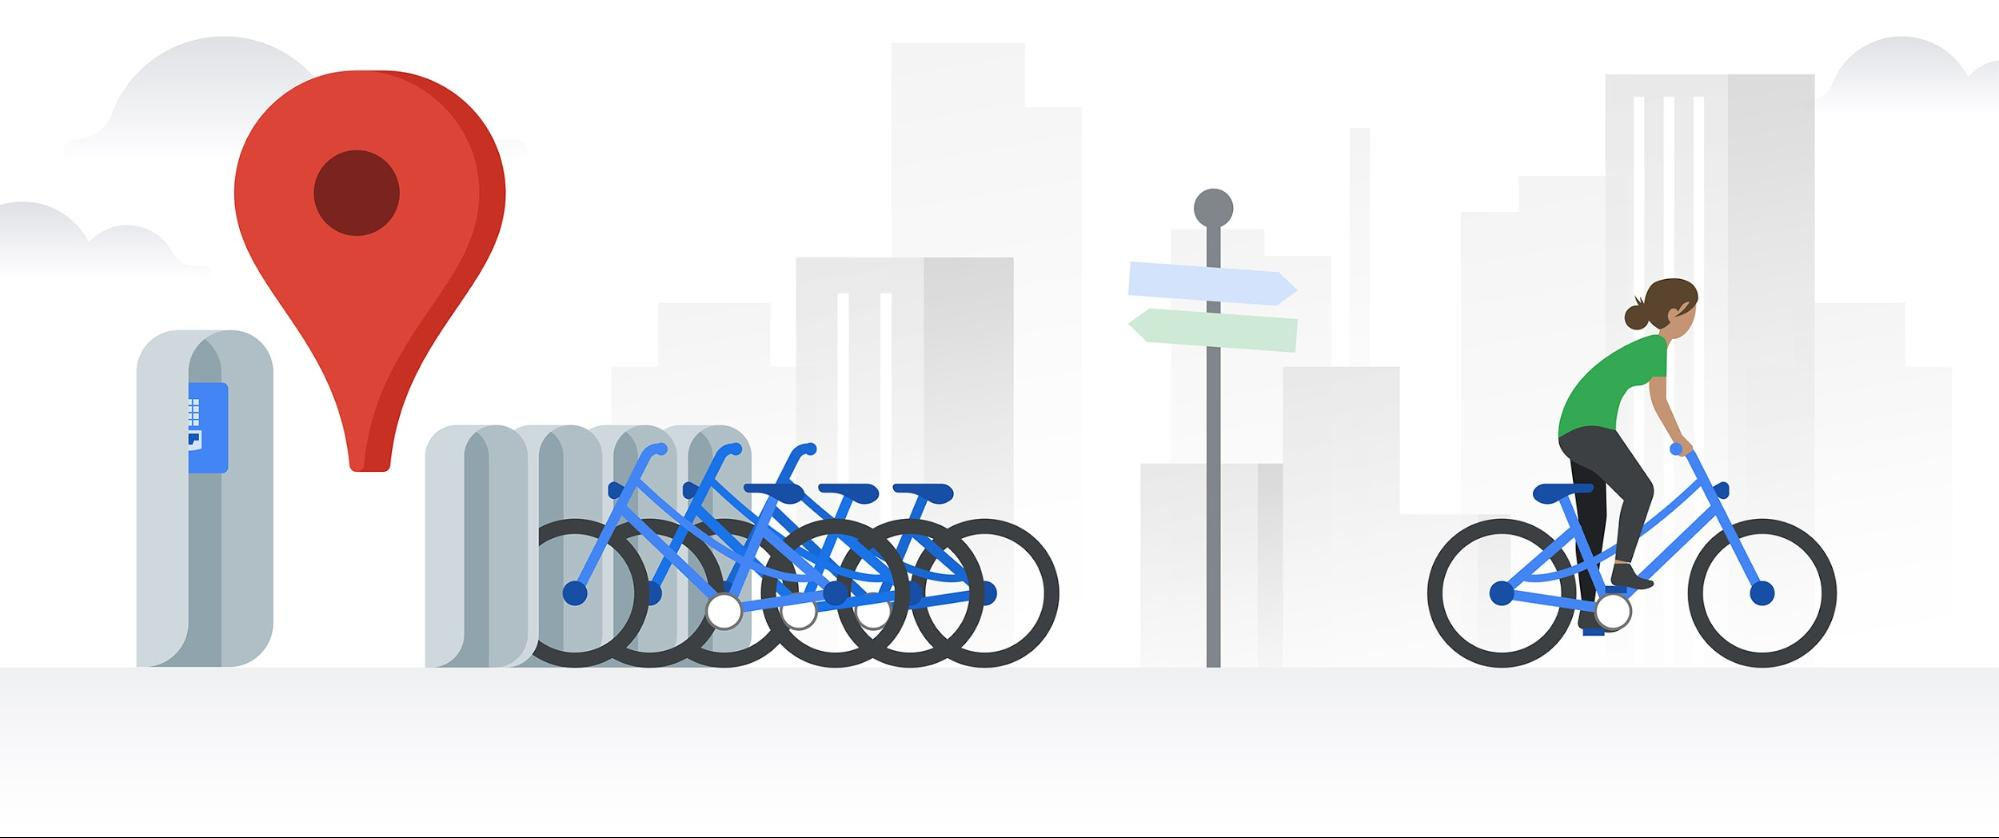

# PROBLEM STATEMENT

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

Our job is to develop a regression model based on the important variables which can help in predicting the demand for shared bikes.This will help the management to strategise their buisness plan and to meet their user's Bike Sharing Demand.

Let us start our excercise by importing important libraries that will be required while analysing our data.

# Importing Data Set And Basic Data Exploration

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Impoting Important Libraries

import pandas as pd                     # to bring data analysis tools and libraries
import numpy as np                      # To perform numerical/mathematical operation on array
import matplotlib.pyplot as plt         # For plotting data
%matplotlib inline 
import seaborn as sns                   # for statistical graphics
import datetime                         #supplies classes to work with date and time

from numpy import math
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [59]:
# Importing the Bike Sharing Dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Capstone Regression/2.Bike Sharing/Copy of SeoulBikeData.csv',
                  encoding= 'unicode_escape')

In [60]:
# Displaying size of the data

df.shape

(8760, 14)

In [61]:
# Displaying top 5 rows

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [62]:
# Displaying Bottom 5 Rows

df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [63]:
# Taking a look at variable's name

df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [64]:
# Displaying Data Set Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [65]:
# Checking description for numerical variables

df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


 *We have done an overview of our data.*
* We have got 14 features and  8760 rows.
* 'Rented Bike Count' is our dependent variable. 
* There are no null values in any of the column. Phewww !!
* Out of 14 Variables - 4 Variables are of Object Dtype , while 10 are of numerical Dtype.

--------------------------------------------------------------------------

# Data Wrangling

### 1. Checking for Duplicates

In [66]:
# Checking for duplicates
check_dupl = df.duplicated(keep = False).any()
print(check_dupl)

False


Result : There are no duplicate rows. 

### 2. Checking For Null Values...again !

In [67]:
# Displaying Null Values

df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Result : No Null Values Found !!

---------------------------------------------------------------------------

 
### 3. Feature Engineering 

#### a) Date Column

In [68]:
# Let's check how many years data is taken

years_in_data = pd.to_datetime(df['Date']).dt.year.unique()
months_in_data = pd.to_datetime(df['Date']).dt.month.nunique()

print(f'{months_in_data} months data for year {years_in_data}  is captured in the given dataset.')


12 months data for year [2017 2018]  is captured in the given dataset.


Date variable contains information of - day,month and year for a given data. Since, data is of only two years, we can ignore the 'Year' Part of the information. 'Month'  and 'Day' information we can use to look for a trend of bike booking. Let us implement this.

In [69]:
# Extracting Weekend and Month from Date Column information

df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].apply(lambda x : x.month)
df['day'] = df['Date'].dt.day_name()
df['weekend']= df['day'].apply(lambda x : 1 if x == 'Saturday' or x == 'Sunday' else 0)
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day,weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0


Now that we have extracted the relevant information from "Date" column, let us drop 'Date' Column. 

In [70]:
# Dropping 'Date' column

df = df.drop(['Date'],axis=1)

#### b) Functioning Day
The "Functioning day" feature is unwanted as it is obvious that in a non-functioning hours/day the "Rented Bike Count" will be zero and hence this information doesn't add any value .So, let us drop this column as well.

In [71]:
# Dropping 'Functioning Day' column

df = df.drop(['Functioning Day'], axis=1)

In [72]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,month,day,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,0


### 4. Checking for Outlier

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

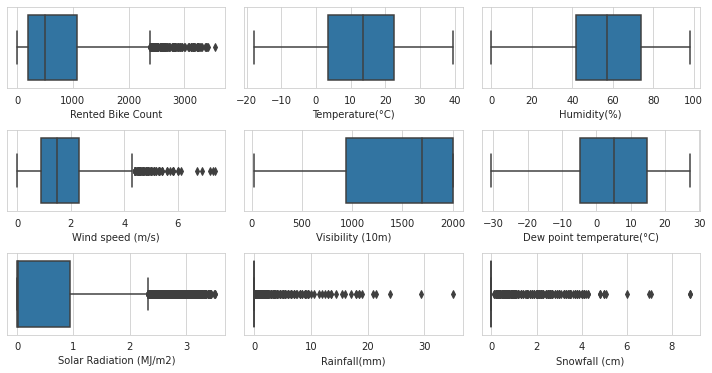

In [73]:
# Plotting the outliers
fig = plt.subplots(figsize=(10,10))

for i,j in enumerate(['Rented Bike Count','Temperature(°C)','Humidity(%)',
                      'Wind speed (m/s)', 'Visibility (10m)',
                      'Dew point temperature(°C)','Solar Radiation (MJ/m2)',
                      'Rainfall(mm)','Snowfall (cm)']):
    plt.subplot(6,3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(df[j])
    plt.tight_layout()

We can see that there are 5 variables where outliers are present - Rented Bike Count, Rainfall, Snowfall,Solar Radiation and windspeed. One should note that all four out of five variables are seasonal event. Let us check whether their max and minimum values seems superficial.

------------------------------------------------------------------------------

In [74]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekend
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,0.290411
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,0.453978
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,1.000000


It is evident from boxplot and above description that, since the outliers are in only seasonal events and their max and min numbers are not superficial, we can consider these outliers as allowable.

--------------------------------------------------------------------------

# EXPLORATORY DATA ANALYSIS

We have got two types of independent variables in our data - Continous type and Catagorical Type. Let us make two seperate dataframe for Catagorical Variables and Continous Variables. This will help us to analyse both types differently.

In [75]:
# Seperating Continous and catagorical variable for future usage.

cat_df= df[['Hour','Seasons','Holiday','month','day','weekend']]                # Catagorical Variables

num_df = df[['Rented Bike Count','Temperature(°C)','Humidity(%)',               #Continous Variables
             'Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)',
             'Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']] 

#### 1. Checking Correlation of numerical Variables

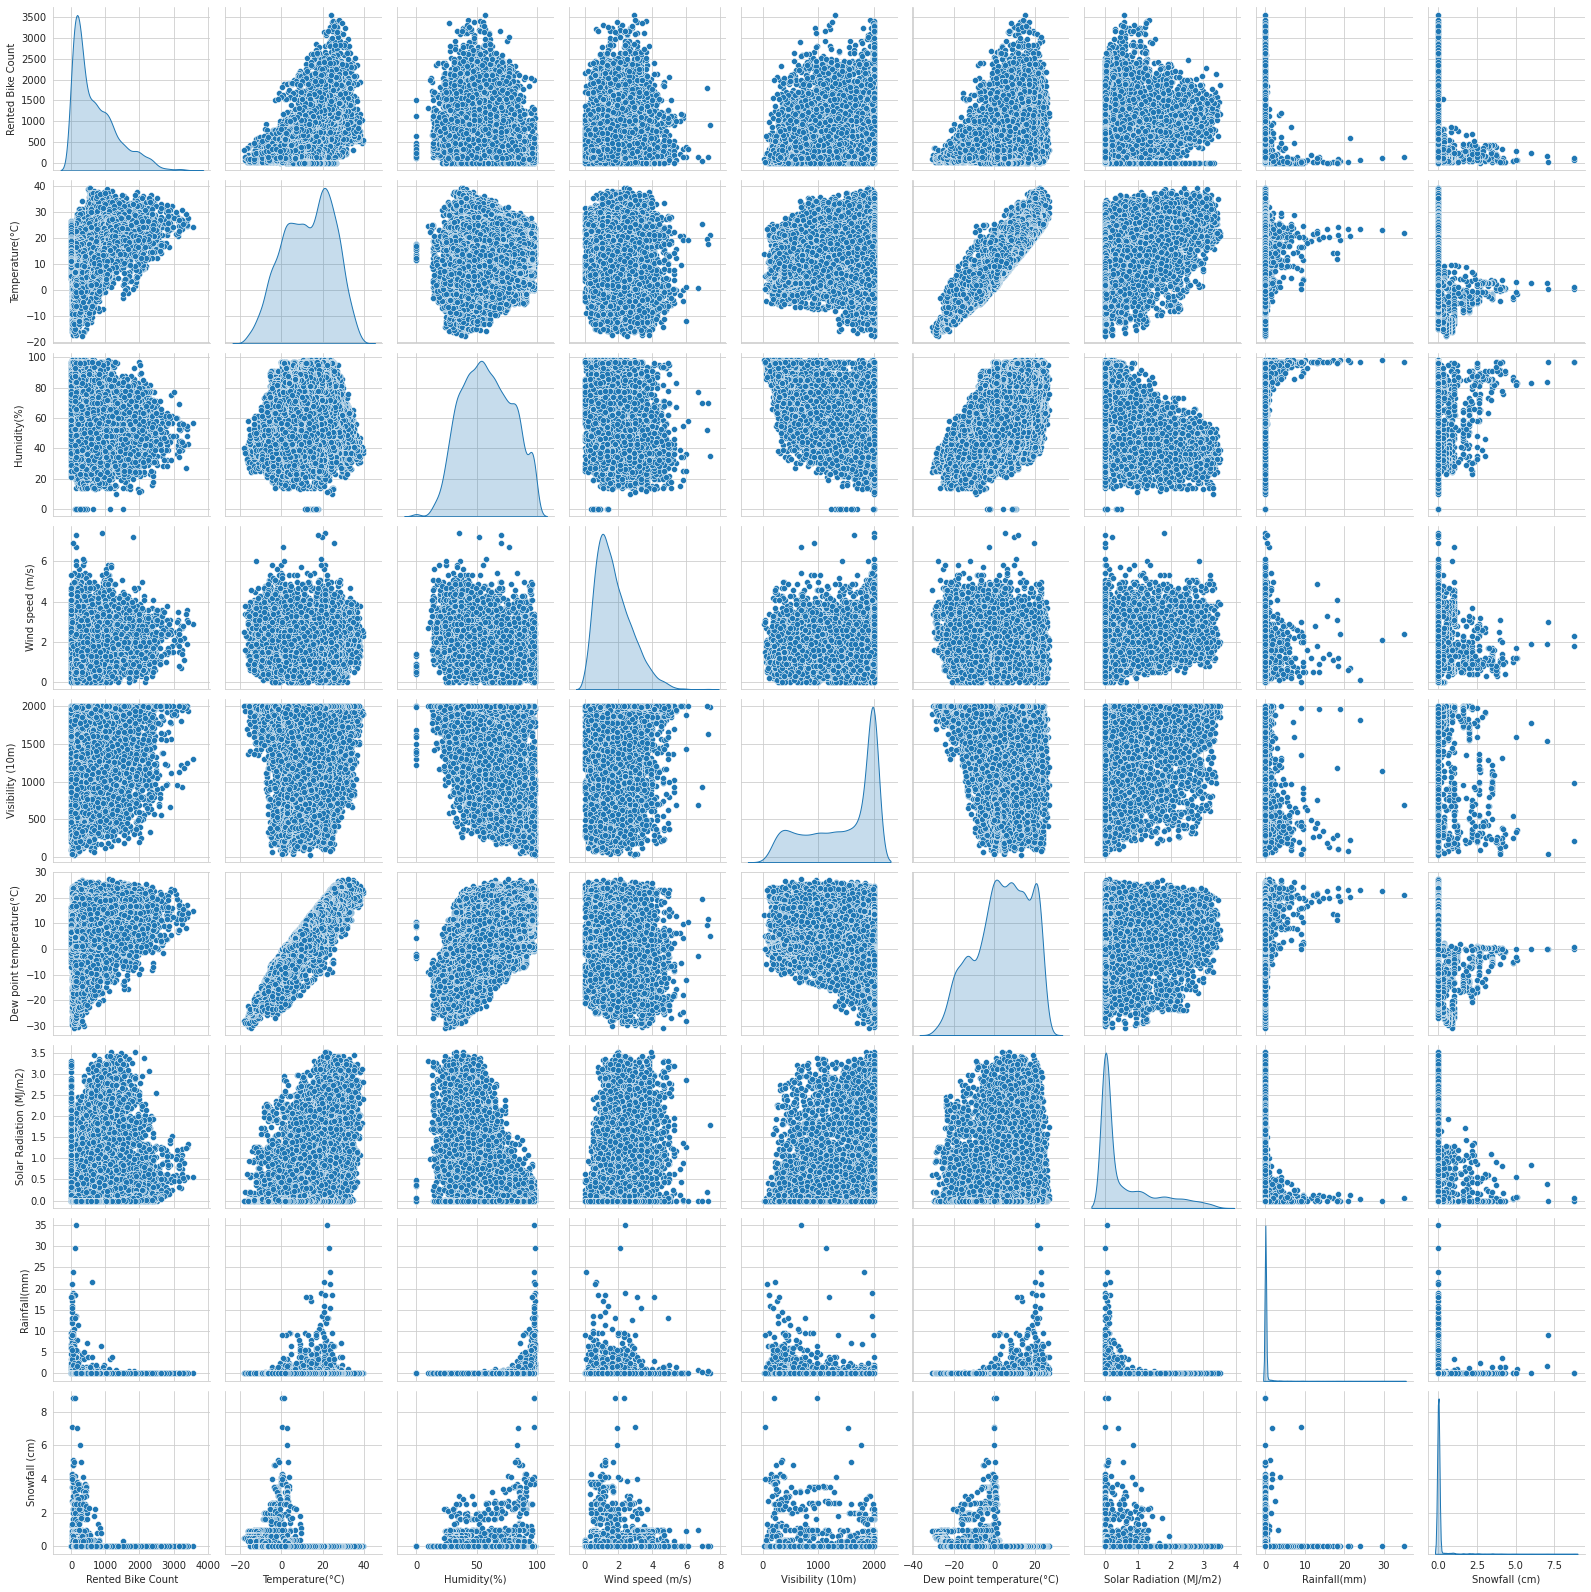

In [76]:
# Displaying Pairplot:

sns.pairplot(num_df, diag_kind='kde')
plt.show()

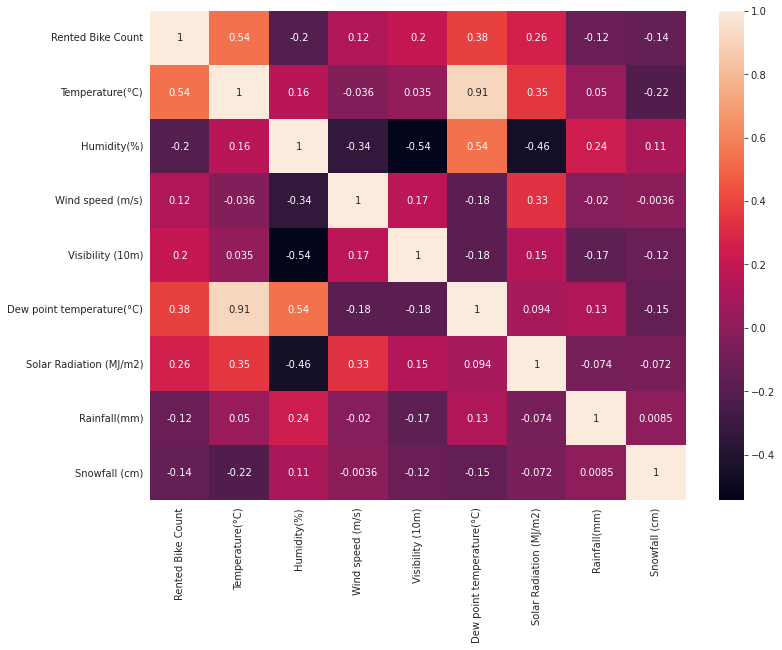

In [77]:
# Plotting Coorelation HeatMap

plt.subplots(figsize=(12, 9))
sns.heatmap(num_df.corr(), annot = True)

* To know how much each variable will contribute to the result of model training, we shall remove every hint of multicollinearity. Since, variables 'Temperature' and  'Dew Point Temperature' are positively related, hence we shall keep only one of them.

----------------------------------------------------------------------------

In [78]:
# Removing Multicollinearity by dropping 'Dew Point Temperature' column

df= df.drop(['Dew point temperature(°C)'],axis =1)

# Updating num_df

num_df =num_df.drop(['Dew point temperature(°C)'],axis =1)

#### 2) Effect of Hour on Bike Sharing Demand

[Text(0.5, 1.0, 'Rented Bike Count During different Seasons')]

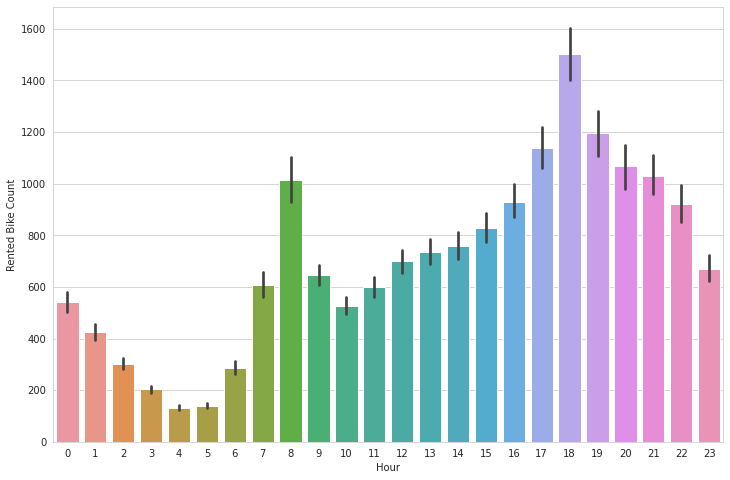

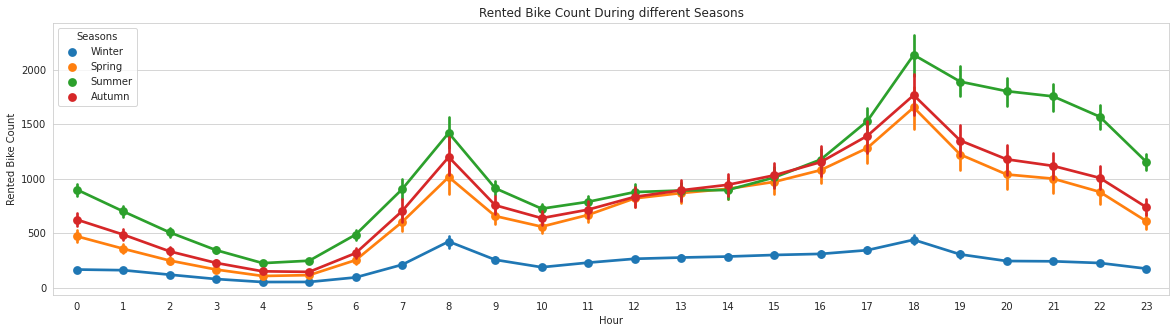

In [79]:
# Displaying Hourly basis Bike Demand

plt.figure(figsize = (12,8))
sns.barplot(x='Hour', y='Rented Bike Count', data = df)

# Displaying Hourly basis Bike Demand in different seasons

fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='Seasons', ax=ax)
ax.set(title='Rented Bike Count During different Seasons')

Insight : 
* The Bike sharing demand increases to maximum between 5pm to 7PM. The demand usually peaks at around 6pm. 
* Morning between 3am to 4am, Bike Demand is minimum.
* The Hourly demand pattern for all seasons is nearly same.

------------------------------------------------------------------------

#### 3. Seasons vs Rented Bike Count

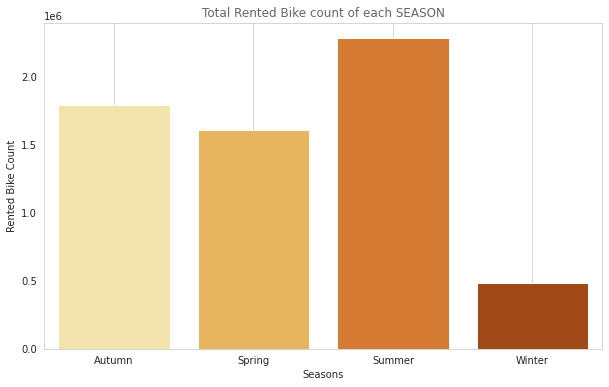

In [80]:
plt.figure(figsize=(10,6))


# Seasonal Wise Bike Sharing Demand
seasonal_affect = df.groupby('Seasons',as_index = False)['Rented Bike Count'].sum()
sns.barplot(x='Seasons',y='Rented Bike Count',data=seasonal_affect, palette='YlOrBr')
    
ax.set(xlabel="Seasons", ylabel = "")
plt.title('Total Rented Bike count of each SEASON',alpha=0.7)
plt.grid(b=None,axis='both')

plt.show()

Insights
* Bike sharing demand decreases in Winter Season
* Summer draws the maximum demand

------------------------------------------------------------------------

#### 4. Month vs Rented Bike Count

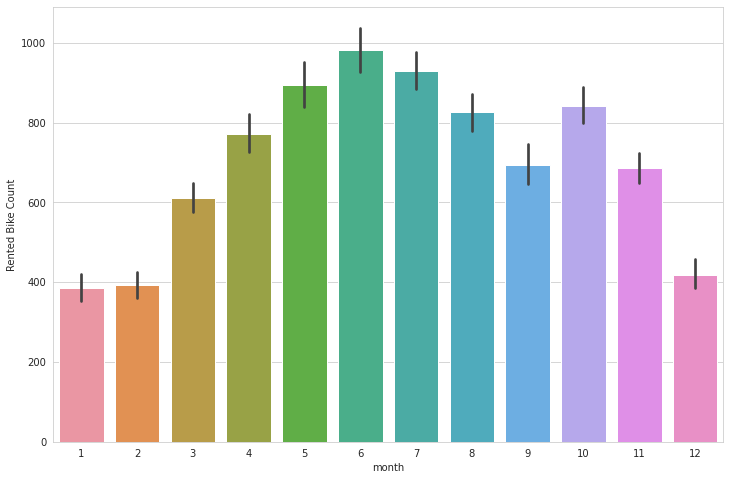

In [81]:
#Create the figure object

plt.figure(figsize = (12,8))
sns.barplot(x='month', y='Rented Bike Count', data = df)

Insight
* At Evening 6pm , demand goes Maximum. Morning between 7am to 8 am and in evening between 5pm to 7pm are high demand time slots

---------------------------------------------------------------------------

#### 4) Affect Of Weekday and Weekend !

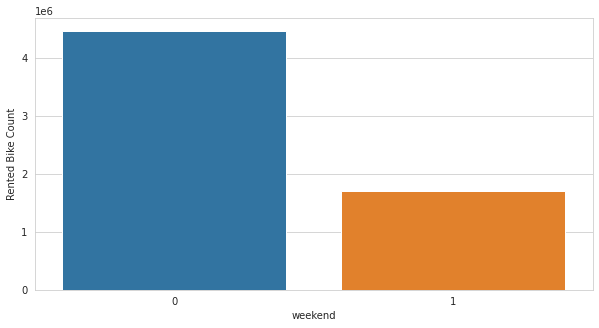

In [82]:
weekend_affect = df.groupby('weekend', as_index = False)['Rented Bike Count'].sum()

plt.figure(figsize=(10,5))
sns.barplot(x= 'weekend' , y='Rented Bike Count', data= weekend_affect)

Insight
* Bike sharing demand is more than double on Weekdays compared to Weekends.

--------------------------------------------------------------------------

#### 5) Effect of climate temperature on Rented Bike demand

Text(0.5, 1.0, 'Rented bike count with respect to TEMPERATURE')

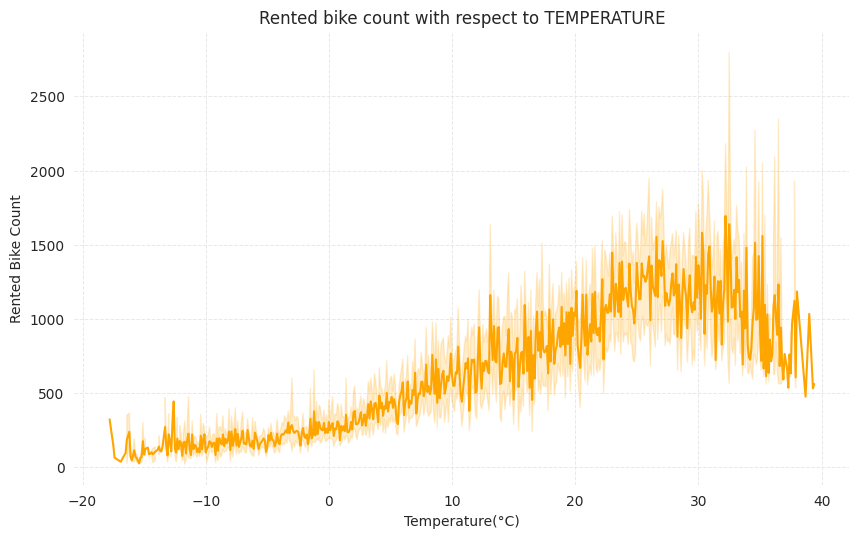

In [83]:
# Let's plot a line plot to display the temperature 
plt.figure(figsize=(10,6), dpi=100)
sns.set_style("whitegrid")

sns.lineplot(data=df, x="Temperature(°C)", y="Rented Bike Count", 
             color='orange')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)

plt.title('Rented bike count with respect to TEMPERATURE')

Insight
* Bike demand peaks when temperature is between 25 to 30 deg Celecius.
* Bike demand falls below 10 Deg. Celcius 

--------------------------------------------------------------------------

### Calculating Variance_Inflation_factor to check multicollinearity

In [84]:
# Creating function for VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

# Calculating VIF
calc_vif(num_df)

,variables,VIF
0,Rented Bike Count,3.428485
1,Temperature(°C),4.415463
2,Humidity(%),4.833669
3,Wind speed (m/s),4.214112
4,Visibility (10m),4.714768
5,Solar Radiation (MJ/m2),2.251838
6,Rainfall(mm),1.095993
7,Snowfall (cm),1.119709


 VIF less than 5 confirms no huge multicollinearity

 --------------------------------------------------------------------------

# Handling Catagorical Variables - Performing One Hot Encoding

In [85]:
# Performing onehot encoder
df = pd.get_dummies(df, columns = ['Hour','month','day','Seasons', 'Holiday'])
df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),weekend,Hour_0,...,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,...,0,1,0,0,0,0,0,1,0,1
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,1,0,1
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,1,0,1


Note: We could have done feature extraction, like PCA to reduce the data size. However, since the size of data wasn’t big enough, we are skipping it.

--------------------------------------------------------------------------

# Splitting Data for Trainng and Testing

In [86]:
# Create the data of independent variables

dependent_variable = "Rented Bike Count"
y = df[dependent_variable].values 

# Create the dependent variable data

independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
X = df[independent_variables].values

In [87]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 2)

### Rescaling Data

In [88]:
# Rescaling data by MinMaxScaler()

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_log_error

# Model Fitting

###  1. Linear Regression

In [90]:
# Importing important module

from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score,mean_absolute_error


In [91]:
# Multiple Linear Regression

regressor=LinearRegression()
regressor.fit(X_train,y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Checking prfromance of model
print ('Linear Regression :')
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))                      # Checking prfromance of model using "Root Mean Squared Error"
print('MSE:',mean_squared_error(y_test, y_pred))                                # Test performance using " Mean Squared Error"
print('MAE:',mean_absolute_error(y_test,y_pred))                                # Test performance using " Mean Absolute Error"
print('R2 score:',r2_score(y_test, y_pred))                                     # Checking " R2 score"

Linear Regression :
RMSE: 399.23230623851015
MSE: 159386.43434451957
MAE: 294.681554414003
R2 score: 0.6112882919408276


### 2. Elastic Net

In [92]:
# Elastic Net

en = ElasticNetCV()
en.fit(X_train,y_train)
y_pred_en = en.predict(X_test)

y_pred_en = en.predict(X_test)

# Checking prfromance of model
print ('Linear Regression :')
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_en)))                      # Checking prfromance of model using "Root Mean Squared Error"
print('MSE:',mean_squared_error(y_test, y_pred_en))                                # Test performance using " Mean Squared Error"
print('MAE:',mean_absolute_error(y_test,y_pred_en))                                # Test performance using " Mean Absolute Error"
print('R2 score:',r2_score(y_test, y_pred_en))                                     # Checking " R2 score"

Linear Regression :
RMSE: 493.66404570202707
MSE: 243704.19001889304
MAE: 365.54789173310803
R2 score: 0.40565411132382034


### 3. Gradient Bossting

In [93]:
# Gradient Boosting Regressor

gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)

# Checking prfromance of model
print ('Linear Regression :')
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_gb)))                      # Checking prfromance of model using "Root Mean Squared Error"
print('MSE:',mean_squared_error(y_test, y_pred_gb))                                # Test performance using " Mean Squared Error"
print('MAE:',mean_absolute_error(y_test,y_pred_gb))                                # Test performance using " Mean Absolute Error"
print('R2 score:',r2_score(y_test, y_pred_gb))                                     # Checking " R2 score"


Linear Regression :
RMSE: 323.0202619565319
MSE: 104342.08963446648
MAE: 213.5748077330907
R2 score: 0.7455304646780228


### 4. Random Forest

In [94]:
#Random Forest

randomiser=RandomForestRegressor()
randomiser.fit(X_train,y_train)

# Predicting the Test set results
y_pred_rf = randomiser.predict(X_test)

# Checking prfromance of model
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_rf)))                      # Checking prfromance of model using "Root Mean Squared Error"
print('MSE:',mean_squared_error(y_test, y_pred_rf))                                # Test performance using " Mean Squared Error"
print('MAE:',mean_absolute_error(y_test,y_pred_rf))                                # Test performance using " Mean Absolute Error"
print('R2 score:',r2_score(y_test, y_pred_rf))  

RMSE: 289.55812244030864
MSE: 83843.90627115677
MAE: 165.39110350076103
R2 score: 0.7955214435215506


### 5. Huber Regressor

In [95]:
# Huber Regressor

hb =  HuberRegressor()
hb.fit(X_train,y_train)
y_pred_hb = hb.predict(X_test)

# Checking prfromance of model
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_hb)))                      # Checking prfromance of model using "Root Mean Squared Error"
print('MSE:',mean_squared_error(y_test, y_pred_hb))                                # Test performance using " Mean Squared Error"
print('MAE:',mean_absolute_error(y_test,y_pred_hb))                                # Test performance using " Mean Absolute Error"
print('R2 score:',r2_score(y_test, y_pred_hb))  

RMSE: 401.3657051937789
MSE: 161094.42930569945
MAE: 290.84383759389516
R2 score: 0.6071228330581625


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Model Validation

In [96]:
# Creating the dataframe of various scores of various models
model_validation = {'Model': ['Linear Regressor', 'Elastic Net', 
                              'Gradient Booster', 'Random Forest',
                              'HuberRegressor'], 
                    'R2 Score': [r2_score(y_test, y_pred),
                                 r2_score(y_test, y_pred_en),
                                 r2_score(y_test, y_pred_gb),
                                 r2_score(y_test, y_pred_rf),
                                 r2_score(y_test, y_pred_hb)], 
                    'RMSE':[np.sqrt(mean_squared_error(y_test, y_pred)),
                            np.sqrt(mean_squared_error(y_test, y_pred_en)),
                            np.sqrt(mean_squared_error(y_test, y_pred_gb)),
                            np.sqrt(mean_squared_error(y_test, y_pred_rf)),
                            np.sqrt(mean_squared_error(y_test, y_pred_hb))],
                    'MAE' :[mean_absolute_error(y_test,y_pred),
                            mean_absolute_error(y_test,y_pred_en),
                            mean_absolute_error(y_test,y_pred_gb),
                            mean_absolute_error(y_test,y_pred_rf),
                            mean_absolute_error(y_test,y_pred_hb)]}
model_validate = pd.DataFrame(model_validation)
model_validate

,Model,R2 Score,RMSE,MAE
0,Linear Regressor,0.611288,399.232306,294.681554
1,Elastic Net,0.405654,493.664046,365.547892
2,Gradient Booster,0.745530,323.020262,213.574808
3,Random Forest,0.795521,289.558122,165.391104
4,HuberRegressor,0.607123,401.365705,290.843838


* From above stats it is clear that Random Forest is giving better results compared to other models. Hence, it is time to tune our Hyperparameters and apply Random Forest again to obtain optimized results.

----------------------------------------------------------------------

#Hyper Paramter Tuning - Randomized Search CV

In [97]:
# Creating the parameters to use in Randomized Search CV
n_estimators = [5,20,50,100]                                                    # number of trees in the random forest
max_features = ['auto', 'sqrt']                                                 # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]                    # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10]                                                  # minimum sample number to split a node
min_samples_leaf = [1, 3, 4]                                                    # minimum sample number that can be stored in a leaf node
bootstrap = [True, False]                                                        # method used to sample data points

random_grid = {'n_estimators': n_estimators,'max_features': max_features,
               'max_depth': max_depth,'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}

In [98]:
rf1 = RandomForestRegressor()                                                   #Applynig regressor

In [99]:
#Applying the hyperparameters to Random search cv
rf1_random = RandomizedSearchCV(estimator = rf1,
                                param_distributions = random_grid,n_iter = 100,
                                cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [100]:
#Fitting the tuned model on train set
rf1_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [101]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf1_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}  



In [102]:
randmf = RandomForestRegressor(n_estimators=50, min_samples_split= 6, 
                               min_samples_leaf= 1, max_features= 'sqrt',
                               max_depth= 40, bootstrap= False ) 
randmf.fit( X_train, y_train) 

RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                      min_samples_split=6, n_estimators=50)

In [103]:
# Predicting the Test set results
y_pred = randmf.predict(X_test)

# Checking Tuned prfromance of model
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))                      # Checking prfromance of model using "Root Mean Squared Error"
print('MSE:',mean_squared_error(y_test, y_pred))                                # Test performance using " Mean Squared Error"
print('MAE:',mean_absolute_error(y_test,y_pred))                                # Test performance using " Mean Absolute Error"
print('R2 score:',r2_score(y_test, y_pred))      

RMSE: 278.4252246215733
MSE: 77520.60570557356
MAE: 170.8295394228214
R2 score: 0.810942711796531


 After Hyper Parameter tuning our R2_score  has been improved (0.814).

----------------------------------------------------------------------

# Conclusion

* After loading our data, we performed feature engineering on it by removing irrelevant variables and deriving the new ones. Further, we performed EDA and tried drawing insights from the data, like :
    * Rented biked sharing demand goes highest in "summer" while it falls to least in "winter".
    * The bike sharing demand shoots up to peak between 5pm to 7pm and 7 am to 9 am. The demand is lowest between 4am to 5 am
    * The bike counts starts increasing the afternoon (from 3pm to 8pm) where temperature is the highest, with the most
       visibility, windspeed, and least humidity
* Then we hot encoded categorical variables and rescaled the Numerical Variables. 
* After splitting our data into 1:4 ratio for testing and training, we applied five regression models. We also used metrics to find the performance of all the applied models. 
* From the metrics result we found that the “Random Forest” model gave the best result , with 97% R2 score. Finally, We did hyperparameter tuning (Randomized Grid Search) for better results.
